# Loan Prediction

The objective of the project is to identify the loan applicant is eligible for loan or not.

In [74]:
#Importing necessary libraries
import numpy as np
import pandas as pd

In [75]:
#importing the dataset 
loan_approvals = pd.read_csv(r'G:\ML\Datasets\Loan_train.csv')
loan_approvals.head()                             

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
#Studying the dataset
loan_approvals.size

7982

In [77]:
loan_approvals.shape

(614, 13)

So we have total 7982 records.
We have 13 features and 614 observations

In [78]:
#Features in the data set
loan_approvals.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Looking at the data in dataset we have both categorical and continuous features.

Categorical features : Gender, Married, Education , Self_employed, Credit_History, Property_Area, Loan_Status, Dependents

Continuous Features :  Applicant Income, Coapplicant Income, Loan_Amount, Loan_Amount_Term

In [79]:
loan_approvals.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
#Datatyes of features
loan_approvals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


We have 12 independent features and 1 dependent feature.

Our objective is to predict the eligblity of the loan applicant for a loan , so Loan_ Status feature is our Dependent variable(Y) and rest all features are Independent Features(X).

Now we need to select the important features to build our model. And below are my assumptions.

Feature Loan_ID doesnt help us in predicting the eligblity of applicant for a loan approval so will not be considering Loan_Id feature in Model Building.

Credit_History, ApplicantIncome, Coapplicant Income are the most Important parameters for building our model.

Lets understand different features using mathematical Plots. 






In [81]:
#Import Libraries necessary for ploting different graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

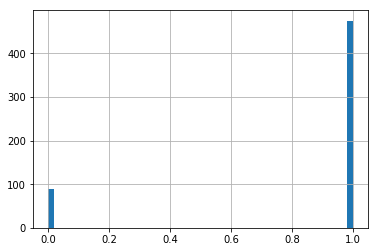

In [82]:
loan_approvals['Credit_History'].hist(bins=50)

In [83]:
pd.crosstab(loan_approvals ['Credit_History'], loan_approvals ['Loan_Status'], margins=True,normalize=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.145390,0.012411,0.157801
1.0,0.171986,0.670213,0.842199
All,0.317376,0.682624,1.000000


Observations from the Plot for Credit Score states that most of the loan applicants have a very good repayment history and are more eligible for loan approvals. And for the bank they are the privelaged costumers. 

Higher the credit score more is the probablity of loan approval.

In [84]:
pd.crosstab(loan_approvals ['Loan_Status'], loan_approvals ['Gender'], margins=True,normalize=True)

Gender,Female,Male,All
Loan_Status,,,
N,0.061564,0.249584,0.311148
Y,0.124792,0.564060,0.688852
All,0.186356,0.813644,1.000000


Loan for Males will likely get approved than for females.

In [85]:
pd.crosstab(loan_approvals ['Loan_Status'], loan_approvals ['Education'], margins=True,normalize=True)

Education,Graduate,Not Graduate,All
Loan_Status,,,
N,0.228013,0.084691,0.312704
Y,0.553746,0.133550,0.687296
All,0.781759,0.218241,1.000000


Graduates are more eligible for Instant loan approvals

In [86]:
pd.crosstab(loan_approvals ['Loan_Status'], loan_approvals ['Self_Employed'], margins=True, normalize=True)

Self_Employed,No,Yes,All
Loan_Status,,,
N,0.269759,0.044674,0.314433
Y,0.589347,0.096220,0.685567
All,0.859107,0.140893,1.000000


Applicats with Regular Monthly Income are more likely to get loan approved then self employed applicant, it is mainly due to monthly fixed income being credited to Employed applicants.

In [87]:
pd.crosstab(loan_approvals ['Loan_Status'], loan_approvals ['Dependents'], margins=True,normalize=True)

Dependents,0,1,2,3+,All
Loan_Status,,,,,
N,0.178631,0.060100,0.041736,0.030050,0.310518
Y,0.397329,0.110184,0.126878,0.055092,0.689482
All,0.575960,0.170284,0.168614,0.085142,1.000000


Applicants with No dependents are more likely to get loan approved then with applicants having 3+ dependents

In [88]:
pd.crosstab(loan_approvals ['Loan_Status'], loan_approvals ['Married'], margins=True,normalize=True)

Married,No,Yes,All
Loan_Status,,,
N,0.129296,0.184943,0.314239
Y,0.219313,0.466448,0.685761
All,0.348609,0.651391,1.000000


Certainity of Married Applicant's loan getting approved is more than Unmarried applicant's.

In [89]:
pd.crosstab(loan_approvals ['Loan_Status'], loan_approvals ['Property_Area'], margins=True,normalize=True)

Property_Area,Rural,Semiurban,Urban,All
Loan_Status,,,,
N,0.112378,0.087948,0.112378,0.312704
Y,0.179153,0.291531,0.216612,0.687296
All,0.291531,0.379479,0.328990,1.000000


Loan Applicants staying in Semi Urban Area area are more likely eligible for Loan Approval then in Rural and Urban Area

Looking at the above values it is true that Married Graduate Males Staying in Semi Urban Area are more probable for loan approval.

Dropping the loan_id feature as it doesnt help us in identifying the eligblity of a loan, our new dataset is as belo

In [90]:
#Selection of features
df=loan_approvals.iloc[:, 1:13]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DataSet Wrangling

Looking at dependents feature we have +3 value which counts to 51, this data will probably impact mathematical calculations

So we will replace 3 with some greater number, let us replace it with 4

In [91]:
df.Dependents.replace('3+',4,inplace=True)

In [92]:
#Checking for Missing Data
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

13 Gender, 3 Married, 15 dependents, 32 Self_Employed , 22 LoanAmount, 14 Loan_Amount_Term, 50 Credit_History feature values are NaN so we will replace them with Most common values in the column

# Dealing with Missing Values in Dataset

In [93]:
df.Married.fillna(value='Yes',inplace = True)
df.Gender.fillna(value='Male',inplace = True)
df.Dependents.fillna(value=0,inplace = True)
df.Self_Employed.fillna(value='No',inplace = True)
df.LoanAmount.fillna(value=df.LoanAmount.median(),inplace = True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0],inplace = True)  
df.Credit_History.fillna(value=1,inplace = True)

In [94]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there are no missing values in the dataset  

Let us look at Numerical Features now

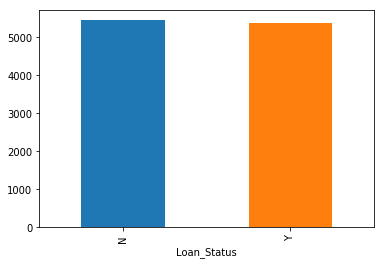

In [95]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


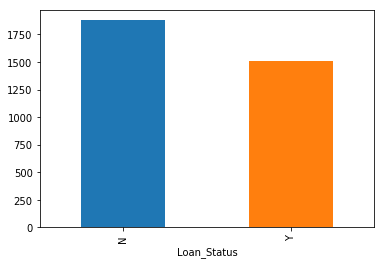

In [96]:
df.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

Practically we assume that more the income of the applicant and coapplicant chances of loan approval will be higher, but in the case above we cannot infer anything much.

We cannot infer any relationship between applicantIncome, coapplicantIncome and Loan_Status.

So, let’s make bins for the applicant income , coapplicant Income variables based on the values in it and analyze the corresponding loan status for each bin.

In [97]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
df['ApplicantIncome']   # a look of the column
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

In [98]:
pd.crosstab(df.Loan_Status,df.Income_bin,margins=True,normalize=True)

Income_bin,Low,Average,High,Very High,All
Loan_Status,,,,,
N,0.055375,0.109121,0.073290,0.074919,0.312704
Y,0.120521,0.258958,0.159609,0.148208,0.687296
All,0.232899,0.368078,0.175896,0.223127,1.000000


In [99]:
bins=[0,1000,3000,45000]
group=['Low','Average','High']
df['ApplicantIncome']   # a look of the column
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [100]:
pd.crosstab(df.Loan_Status,df.Coapplicant_Income_bin,margins=True,normalize=True)

Coapplicant_Income_bin,Low,Average,High,All
Loan_Status,,,,
N,0.008798,0.178886,0.093842,0.281525
Y,0.055718,0.472141,0.190616,0.718475
All,0.284457,0.064516,0.651026,1.000000


Bivariant analysis of coapplicant income completely contradicts our assumptions of higher income , higher the probablity of loan approval.So let me use a new variable ie Total Income to analyse the relationship between Loan Status and Income. 

In [101]:
#Adding CoapplicantIncome and ApplicantIncome and creating a new column Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [102]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
df['TotalIncome']   # a look of the column
df['TotalIncome_bin']=pd.cut(df['TotalIncome'],bins,labels=group)

In [103]:
pd.crosstab(df.Loan_Status,df.TotalIncome_bin,margins=True,normalize=True)

TotalIncome_bin,Low,Average,High,Very High,All
Loan_Status,,,,,
N,0.022801,0.052117,0.105863,0.131922,0.312704
Y,0.016287,0.141694,0.258958,0.270358,0.687296
All,0.402280,0.364821,0.039088,0.193811,1.000000


When we see the analysis results for Total Income our assumptions are right which says higher income higher the probablity of loan approval

Let us analyse for Loan Amount Variable

In [104]:
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

In [105]:
pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])

Loan_Status,N,Y
LoanAmount_bin,,
Low,47,107
Average,114,266
High,31,49


So from Bivariante analysis it is clear that when the loan amount is average and low the probablity of loan approval is high

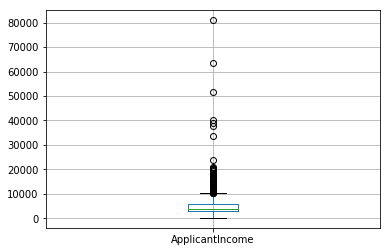

In [106]:
df.boxplot(column='ApplicantIncome')

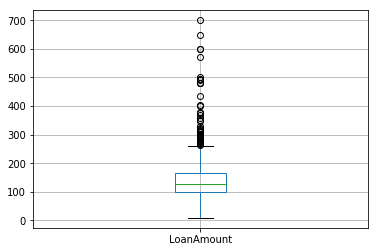

In [107]:
df.boxplot(column='LoanAmount')

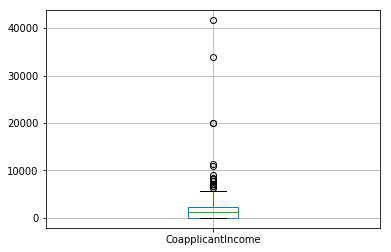

In [108]:
df.boxplot(column='CoapplicantIncome')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


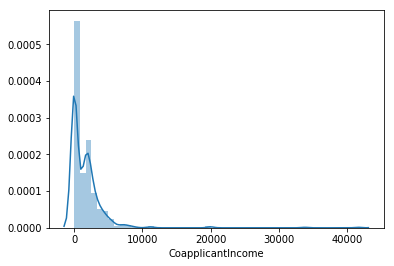

In [109]:
sns.distplot(df['CoapplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


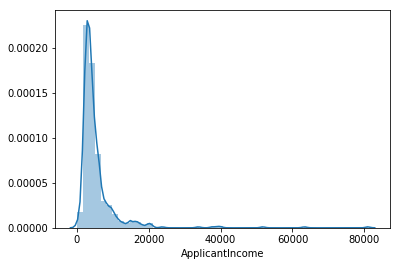

In [110]:
sns.distplot(df['ApplicantIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


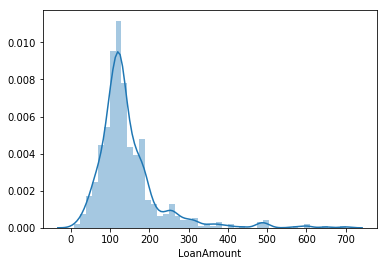

In [111]:
sns.distplot(df['LoanAmount'])

We can see that the three numerical features LoanAmount, ApplicantIncome, CoapplicantIncome have more outliners and they are right skewed

which says that the data is not normally distributed and will certainly impact for mathematical model calculations. We will now work on these three numerical values


In [112]:
#log Transformation for feature scaling
df['LoanAmount_log'] = np.log(df['LoanAmount'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


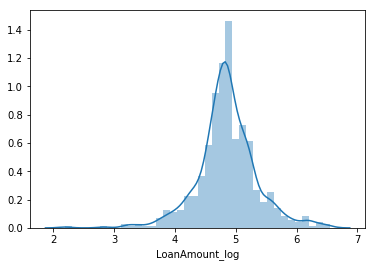

In [113]:
sns.distplot(df['LoanAmount_log'])

In [114]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


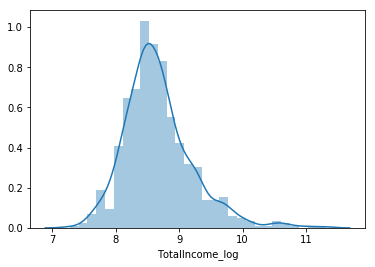

In [115]:
sns.distplot(df['TotalIncome_log'])

In [116]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'TotalIncome',
       'TotalIncome_bin', 'LoanAmount_bin', 'LoanAmount_log',
       'TotalIncome_log'],
      dtype='object')

From the graps above for Loan amount and Total Income we can see that after log transformation we have reduced the skewness and have normally distributed data.

Dropping unwanted features such LoanAmount_bin, TotalIncome_bin, Coapplicant_Income_bin, Income_bin

In [117]:
df = df.drop(['LoanAmount_bin', 'Income_bin','Coapplicant_Income_bin', 'TotalIncome_bin'], axis=1)

In [118]:
#Converting Categorical data into numeric data
df.Loan_Status.replace('N' , 0, inplace=True)
df.Loan_Status.replace('Y', 1 , inplace= True)

In [119]:
df=df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1)
df=pd.get_dummies(df)

In [120]:
x = df.drop('Loan_Status',1)

In [121]:
y = df.Loan_Status

In [122]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3,random_state = 21)

In [123]:
#Selecting  the model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [124]:
#Fitting the model selected
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
y_predict = model.predict(x_test)

In [126]:
accuracy_score=accuracy_score(y_test,y_predict)
accuracy_score

0.8216216216216217

The the ML model predicts the Loan eligiblity by 82% of its accuracy.